# Homework 5: Confidence Intervals, the Bootstrap, and Autograders
***

**Name**: Toshal Ghimire

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday November 10th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [189]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.stats import norm 
import math
import random
%matplotlib inline

### [20 points] Problem 1 - Alcohol Content of Red vs White Wine 
***

Load the data in $\texttt{winequality-red.csv}$ and $\texttt{winequality-white.csv}$ into Pandas DataFrames.  A description of this dataset can be found on [Berkeley's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The characteristic that we'll be interested in is the wine's alcohol content.  

In [3]:
red = pd.read_csv("winequality-red.csv",sep=';')
white = pd.read_csv("winequality-white.csv",sep=';') 

white.mean() 

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

**Part A**: Are we justified in using the assumptions of the Central Limit Theorem in our analysis of estimates of the mean of the data?  Justify your response. 

key point of the CLT is the distribution of the sample mean tends towards the normal distribution as the sample size increases regualdless of the distributions from which we are sampling, since we are able to use a sample size that is greater than 30 , we are justified in using the assumptions of the CLT

**Part B**: Compute a 95% confidence interval for the mean of the red wine's alcohol content.  Separately, compute a 95% confidence interval for the mean of the white wine's alcohol content. Do all computations in Python. 

confidence formula is 

$$ \bar{x} \pm Z_{\frac{\sigma}{2}} ~ \frac{\sigma}{\sqrt{n}}$$

In [4]:
std_R = red.alcohol.std()
n_R = red.alcohol.count()
Zscore_95 = norm.ppf(1-(.05/2))
X_bar_R = red.alcohol.mean()

CI_of_red = (X_bar_R - Zscore_95 * (std_R/ math.sqrt(n_R)) , X_bar_R + Zscore_95 * (std_R/ math.sqrt(n_R)))

print("The 95% confidence interval for the mean of red wines alcohol is ",CI_of_red)

std_W = white.alcohol.std()
n_W = white.alcohol.count()
Zscore_95 = norm.ppf(1-(.05/2))
X_bar_W = white.alcohol.mean()

CI_of_white = (X_bar_W - Zscore_95 * (std_W/ math.sqrt(n_W)) , X_bar_W + Zscore_95 * (std_W/ math.sqrt(n_W)))

print("The 95% confidence interval for the mean of red wines alcohol is ",CI_of_white)


The 95% confidence interval for the mean of red wines alcohol is  (10.370750037060759, 10.475216191832246)
The 95% confidence interval for the mean of red wines alcohol is  (10.479803270898106, 10.54873082465117)


**Part C**: Compute the 95% confidence interval for the difference between the means of the alcohol content of red and white wine. 

confidence formula for a diffrence is is 

$$ (\bar{x_1} -\bar{x_2}) \pm Z_{\frac{\sigma}{2}} ~ \sqrt{\frac{\sigma^2_1}{n_1} + \frac{\sigma^2_1}{n_2}}$$

In [5]:

CI_of_Diffrence = ((X_bar_W - X_bar_R) - Zscore_95 *  math.sqrt(( std_W**2 / n_W ) + ( std_R**2 / n_R )),(X_bar_W -X_bar_R) + Zscore_95 *  math.sqrt(( std_W**2 / n_W ) + ( std_R**2 / n_R )))

print("The 95% confidence interv|al for the difference between the means of the alcohol content of red and white wine is ", CI_of_Diffrence)                   

The 95% confidence interv|al for the difference between the means of the alcohol content of red and white wine is  (0.028705612083630899, 0.15386225457263999)


**Part D**: Interpret the confidence interval you computed in **Part C** in one or two sentences.  Can you say that it's likely that there is a difference in mean alcohol content between red and white wine?  

we are 95% confident that the difrence between the average alcohol precent of white wine and red wine is between 0.0287 and 0.1538 

using white.alcohol.mean() - red.alcohol.mean() the actual diffrence turned out to be 0.0913 witch is within the the interval i calcuated in C

### [15 points] Problem 2: Election Polling
***

On the eve of an important senate seat election, a pollster polls a simple random sample of the population and asks which candidate they plan to vote for on the following day. In particular, the pollster asks if the respondents plan to vote for Candidate A, Candidate B, or some other candidate.  The results of the poll can be found in the following table: 

\begin{array}{ccc}
\hline 
\textrm{Candidate A} & \textrm{Candidate B} & \textrm{Other} \\
\hline 
1204 & 1099 & 205  \\
\hline 
\end{array}

**Part A**: Poll results are typically reported as a predicted **percentage** of the electorate plus or minus a margin of error, i.e. $\texttt{percentage} \pm \texttt{margin}$.  Express the poll results for Candidates A and B in the specified format at the 95% confidence level. 

$$p \pm Z_{\sigma /2} ~\sqrt{\frac{p(1-p)}{n}} $$

In [289]:
n = 1204 + 1099 + 205
Zscore_95 = norm.ppf(1-(.05/2))


#Candidate A
P_A = 1204 / n
squareroot_A = math.sqrt((P_A *(1-P_A))/n)
MarginOfError_A = Zscore_95*squareroot_A

print("The poll results for Candidate A is", P_A,"±",MarginOfError_A)


#Candidate B
P_B = 1099 / n
squareroot_B = math.sqrt((P_B *(1-P_B))/n)
MarginOfError_B = Zscore_95*squareroot_B

print("\nThe poll results for Candidate B is", P_B,"±",MarginOfError_B)


The poll results for Candidate A is 0.4800637958532695 ± 0.0195527943236

The poll results for Candidate B is 0.4381977671451356 ± 0.0194182968335


**Part B**: Express the poll results as 95% confidence intervals.  Based on these results, would it be responsible for a newspaper to definitely call the election for a particular candidate? Clearly justify your response.



In [68]:
Candidate_A = (P_A - MarginOfError_A,P_A + MarginOfError_A)
Candidate_B = (P_B - MarginOfError_B,P_B + MarginOfError)
print("The intervel for Candidate A is",Candidate_A)
print("The intervel for Candidate B  is",Candidate_B)

#wost case diffrence
diff = Candidate_A[1]-Candidate_B[0]


The intervel for Candidate A is (0.46051100152969815, 0.4996165901768409)
The intervel for Candidate B  is (0.41877947031164775, 0.4489198878569437)


It would not be responsiable for the newespaper to call the election for a particular candinadate beacuse at worst case the diffrence between these two candiates is 0.01, witch is only 1%, at best case the diffrence between the candiates is 0.08, witch is 8%

**Part C**: In the run-up to the next election, the pollster is designing a poll of a city council race between two relatively unknown candidates.  Without having any prior data, how many respondents does the pollster need responses from to guarantee that she will get at most a 2% margin of error at the 95% confidence level? Be sure to **clearly** justify your reasoning.  

**Hint**: Recall that when computing confidence intervals for proportions we use the actual sample proportions to approximate the variance.  How can you get a worst-case scenario estimate of the variance when the sample proportion is not known _a priori_? 


$$ error = Z_{\sigma /2} ~\frac{\sigma}{\sqrt{n}} $$

$$ 0.02 =  1.959963984540054 ~\frac{\sigma}{\sqrt{n}} $$

$$ 0.01020426913849308 =  \frac{\sigma}{\sqrt{n}} $$




$$ \sqrt{n} =  {\frac{\sigma}{0.01020426913849308}} $$

Now we dont know the standard deviation, but we know what standard deviation is the square root of variance, $ \sigma = \sigma^2$  where $\sigma^2$ = variance.

according to the hint we can use the actual sample proportions to approximate the variance

$$ S^2 = \frac{\sum( X - X_{average})^2}{N-1} $$

$$ x_{average}  = \frac{ 1204 + 1099 + 205}{3} = 836 $$


$$ S^2 = \frac{(1204 - 836)^2 + (1099 - 836)^2 + (205 - 836)^2}{2} $$

$$ S^2 = \frac{602754}{2} $$

$$ S^2 = 301377 $$

$$ \sigma = \sqrt{S^2} = \sqrt{301377} $$

$$ \sigma = 548.978141641359 $$

so we will use this sigma/standard deviation value for the equation above to solve for n

$$ \sqrt{n} =  {\frac{548.978141641359}{0.01020426913849308}} $$

$$ \sqrt{n} =  53798.869295839606 $$

$$ \sqrt{n}^2 =  53798.869295839606^2 $$

$$ n = 2894318337.5108333 $$


another approach is using p = .5

$$0.02 =  Z_{\sigma /2} ~\sqrt{\frac{p(1-p)}{n}} $$

$$0.02 =  Z_{\sigma /2} ~\sqrt{\frac{0.5(1-0.5)}{n}} $$

$$\frac{0.02} {Z_{\sigma /2}} =  \sqrt{\frac{0.5(1-0.5)}{n}} $$

$${\frac{0.02} {Z_{\sigma /2}}}^2 =  {\sqrt{\frac{0.5(1-0.5)}{n}}}^2 $$

$${\frac{0.02} {Z_{\sigma /2}}}^2 =  {\frac{0.5(1-0.5)}{n}} $$

$$ n =  {\frac{0.5(1-0.5)}{{\frac{0.02} {Z_{\sigma /2}}}^2}} $$

$$ n = 2400.9999999999995 $$

### [15 points] Problem 3 - Have Opinions on Marijuana Legalization Changed? 
***

The General Social Survey (GSS) has been collecting demographic, behavioral, and attitudinal information since 1972 to monitor changes within the US and to compare the US to other nations. Support for the legalization of marijuana in the US is shown for 2010 and in 2016 in the following table:


\begin{array}{cccc}
\hline
\textrm{Year} & \textrm{Favor} & \textrm{Oppose} & \textrm{Total} \\ 
\hline
\textrm{2010} & \textrm{603} & \textrm{656} & \textrm{1259} \\
\textrm{2016} & \textrm{1126} & \textrm{717} & \textrm{1843} \\
\hline
\end{array}


**Part A**: Find a 95% confidence interval for the change in the proportion supporting marijuana legalization from 2010 to 2016. Use Python for all computations and show your work. 

$$ P_1 - P_2 \pm Z_{\sigma/2} ~ \sqrt{ \frac{P_1~(1-P_1)}{m} + \frac{P_2~(1-P_2)}{n} }$$

In [132]:
m = 1259
n = 1843
Zscore_95 = norm.ppf(1-(.05/2))

p1 = 603/m
p2 = 1126/n

diff = np.abs(p1-p2)

a = (p1* (1-p1))/m
b = (p2* (1-p2))/n

square_root = math.sqrt(a + b)

output =((diff - Zscore_95*square_root) , (diff + Zscore_95*square_root))
output

(0.09655644289791579, 0.16746124074027999)

**Part B**: Is it likely that the proportion supporting marijuana legalization changed between 2010 and 2016? Justify your conclusion using the ideas of statistical inference and your results from **Part A**. 

yes, from part A, we are 95 percent sure that the precentage diffrence between 2010 and 2016 is within our interval of 9.6556442897915797 precent and  16.746124074028 precent, which is an increase,this means that at worst case the precentage of people who are in favor of marijuana leglization has increaced by at least 9 precent, using python i was able to figure out that the actual precentage increase is 13.2%

### [20 points] Problem 4 - Exploring Confidence Intervals 
***

The so-called [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution is important in several statistical tests.  It's also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [chi2](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chi2.html). 


In [127]:
from scipy.stats import chi2

**Part A**: Complete the following code cell to plot a histogram of realizations from the Chi-squared distribution with parameter $K=3$. 

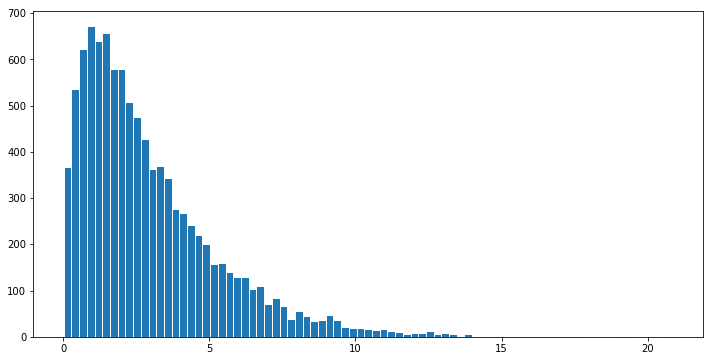

5.8022432479631609

In [129]:
k = 3 
x = chi2.rvs(k, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

plt.hist(x,bins='auto',edgecolor='white')
plt.show()
x.mean()
x.var()

**Part B**: Look up the mean and variance of the Chi-squared distribution with parameter $k=3$ and report them here. 

according to the internet:

    the mean of the Chi-squared distribution is the same as k, so mean of X should be 3
    the variance of the Chi-squared distribution is 2 times k, so variance of x should be 6

In [176]:
print("Using python, the mean of 'x' is",x.mean())
print("Using python, the variance of 'x' is",x.var())

print("\nThese two values agree with the internet")

Using python, the mean of 'x' is 2.95010869598
Using python, the variance of 'x' is 5.80224324796

These two values agree with the internet


**Part C**: In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Chi-squared distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Chi-squared distribution with parameter $k=3$.  For each random sample, compute the 95% confidence interval for the mean.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\mu$ where $\mu$ is the true mean of the distribution. Color confidence intervals black if they cover the true mean, and red if they don't.  

the proportion of successful CI = 0.98


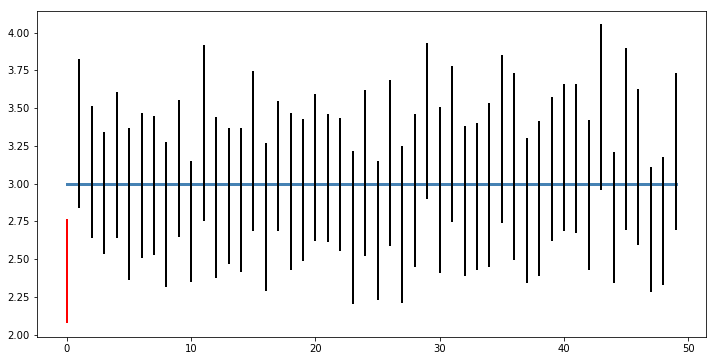

In [194]:
def confidence_intervals(m=500, n=100):
    # TODO
    a = []
    c = np.zeros(m)
    count = 0
    for i in range(m):
        x = chi2.rvs(k, size=n)
        mean = x.mean()
        b = 1.96*(x.std()/np.sqrt(n))
        alower = mean - b
        aupper = mean + b
        a.append([alower,aupper])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    ax.plot([0,49], [3,3],color='steelblue',ls ='-',lw=3)
    random.shuffle(a)
    for i in range(50):
        t = a.pop()
        if (t[0] < 3.0 and 3.0 < t[1]):
            c[i] = 1
        if c[i] == 1:
            ax.plot([i,i],[t[0],t[1]], linewidth=2, color='black')
            count = count + 1
        else:
            ax.plot([i,i],[t[0],t[1]], linewidth=2, color='red')
    prop = count/50
    print('the proportion of successful CI =' ,prop)

confidence_intervals()

**Part D**: Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

the propotions seems to fall around 95% in each run, thus we can say that the CI that covers teh true mean of the distribution agrees with the theory we described in class

### [20 points] Problem 5 - Bootstrapped Confidence Intervals 
***

An important feature in online advertising is the so-called _dwell time_, or the amount of time that a user spends viewing a particular piece of content. The data in dwell_times.csv contains the dwell times (in minutes) for 500 randomly selected users viewing an article on a website.  


**Part A**: Read in the data from dwell_times.csv and create a frequency histogram with 20 bins. 

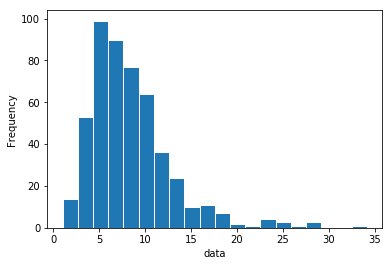

dwell time    500
dtype: int64

In [199]:
data = pd.read_csv("dwell_times.csv")
plt.hist(data["dwell time"],bins=20,edgecolor = "white")
plt.xlabel("data")
plt.ylabel("Frequency")
plt.show()



**Part B**: Complete the function dwell_mean below to create an empirical bootstrapped confidence interval at the 95% confidence level for the mean dwell time.  Use at least 5000 bootstrap resamples. In addition to returning the confidence interval, your function should also plot a histogram of the bootstrap resample means, along with some graphical representation of the 95% confidence interval. 

bootstrapped 95% CI for the Mean:  [ 8.05600229  8.85298573]


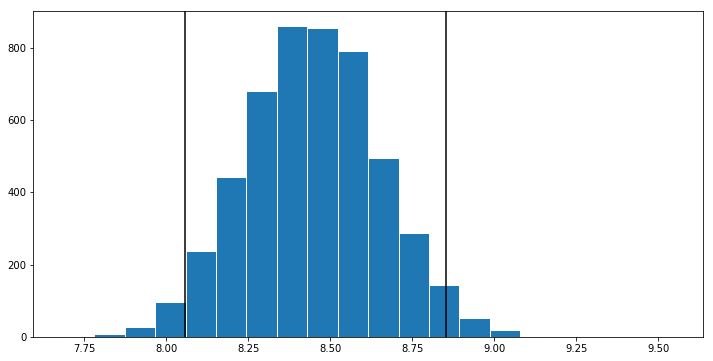

array([ 8.05600229,  8.85298573])

In [282]:
def dwell_mean(df, num_boots=5000, isPlot=False):
    RSample_Mean = np.zeros(num_boots)
    
    for i in range(num_boots):
        RSample_Mean[i] = np.mean(np.random.choice(df,replace=True, size= df.count()))
    
    L = np.percentile(RSample_Mean,2.5)
    R = np.percentile(RSample_Mean,97.5)
    CI = np.array([L, R])
    print("bootstrapped 95% CI for the Mean: ",CI)
    
    
    if isPlot: 
        # TODO plot histogram 
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
        ax.hist(RSample_Mean,bins=20,edgecolor = "white")
        plt.axvline(x=L,color='black')
        plt.axvline(x=R,color='black')
        plt.show()
    
    return CI 

dwell_mean(data["dwell time"],isPlot=True)


**Part C**: Suppose you are told that the actual dwell times in dwell_times.csv were sampled from a [LogNormal]() distribution with parameters $\mu=2$ and $\sigma^2 = \frac{1}{4}$. Go to the linked Wiki page and read about the LogNormal distribution.  Then compute the exact **mean**, **median**, and **standard deviation** of the distribution for the given parameters and report them here. 

mean = $ e^{\mu + \frac{\sigma^{2}}{2}} $

median = $ e^{\mu} $

standard deviation = 	$\sqrt{e^{2\mu+\sigma^{2}} (e^{\sigma^{2}} - 1)}$

In [248]:
mu = 2
var = .25

mean = np.exp(mu + (var/2))
print("Mean according to the wiki pages with the given paramaters mu = 2 and variance = 1/4 is",mean)

median = np.exp(mu)
print("Meadian according to the wiki pages with the given paramaters mu = 2 and variance = 1/4 is",median)

std = np.sqrt((np.exp(2*mu + var))*((np.exp(var)) -1))
print("Meadian according to the wiki pages with the given paramaters mu = 2 and variance = 1/4 is",std)


Mean according to the wiki pages with the given paramaters mu = 2 and variance = 1/4 is 8.37289748813
Meadian according to the wiki pages with the given paramaters mu = 2 and variance = 1/4 is 7.38905609893
Meadian according to the wiki pages with the given paramaters mu = 2 and variance = 1/4 is 4.46225491807


**Part D**: Use the true standard deviation of the distribution to compute a traditional 95% confidence interval for the sample mean of the dwell time data.  Compare the traditional 95% confidence interval to the bootstrapped 95% confidence interval. Do both confidence intervals cover the true mean?  Do both confidence intervals have roughly the same width?   

In [263]:
mean_dwells = data['dwell time'].mean()
std = data['dwell time'].std()
Sqrt_N = math.sqrt(data['dwell time'].mean())

ci = (mean_dwells - Zscore_95*(std/Sqrt_N)),(mean_dwells + Zscore_95*(std/Sqrt_N))
print("The traditional 95% Confidence Interval is ",ci)

The traditional 95% Confidence Interval is  (5.3528828034535074, 11.537397575971472)


Both Confidence intervals from bootstrapped and traditional cover the True mean, but the confidence intervals for the traditional covers a larger width, compare to the bootstraped solutoon

**Part E**: Complete the function dwell_stdev below to create an empirical bootstrapped confidence interval at the 95% confidence level for the standard deviation of dwell time.  Use at least 5000 bootstrapped resamples. In addition to returning the confidence interval, your function should also plot a histogram of the bootstrap resample standard deviations including some graphical indication of the 95% confidence interval.  

The Bootstrapped 95% CI for the Standard Deviation is [ 4.05022679  5.09887051]


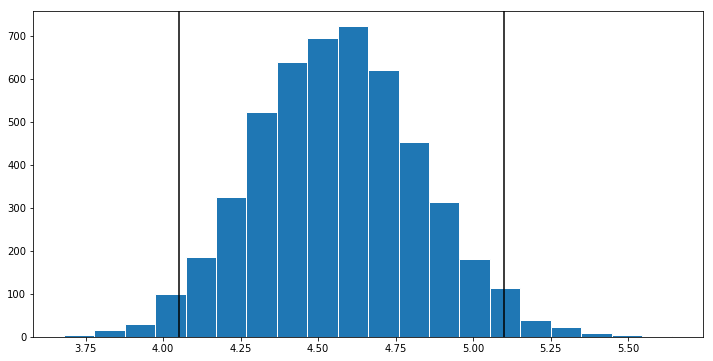

array([ 4.05022679,  5.09887051])

In [283]:
def dwell_stdev(df, num_boots=5000, isPlot=False):
    RSample_STD = np.zeros(num_boots)
    for i in range (num_boots):
        RSample_STD[i] = np.std(np.random.choice(df, replace=True, size=len(df)))
    
    L = np.percentile(RSample_STD, 2.5)
    R = np.percentile(RSample_STD, 97.5)
   
    CI = np.array([L, R])
    print("The Bootstrapped 95% CI for the Standard Deviation is",CI)
    if isPlot: 
        # TODO plot histogram 
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
        ax.hist(RSample_STD,bins=20,edgecolor = "white")
        plt.axvline(x=L,color='black')
        plt.axvline(x=R,color='black')
        plt.show()
    
    return CI

dwell_stdev(data['dwell time'],isPlot=True)


**Part F**: Does the true standard deviation of the distribution fall inside your 95% bootstrapped confidence interval? 

In [280]:
print("The True Standard Deviation for data is: ",data['dwell time'].std())
print("This value Falls within our bootstraped confidence interval of Standard Deviation: [ 4.04532501,  5.09890607]")


The True Standard Deviation for data is:  4.584911700995161
This value Falls within our bootstraped confidence interval of Standard Deviation: [ 4.04532501,  5.09890607]


**Part G**: Complete the function dwell_med below to create an empirical bootstrapped confidence interval at the 95% confidence level for the median dwell time.  Use at least 5000 bootstrap resamples. In addition to returning the confidence interval, your function should also plot a histogram of the bootstrap resample medians including some graphical indication of the 95% confidence interval.  

The Bootstrapped 95% CI for the Standard Deviation is [ 7.05443759  8.03240691]


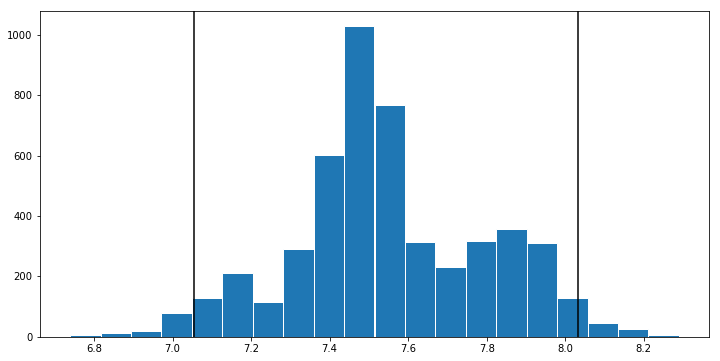

array([ 7.05443759,  8.03240691])

In [285]:
def dwell_med(df, num_boots=5000, isPlot=False):
    RSample_Median = np.zeros(num_boots)
    for i in range (num_boots):
        RSample_Median[i] = np.median(np.random.choice(df, replace=True, size=len(df)))
    
    L = np.percentile(RSample_Median, 2.5)
    R = np.percentile(RSample_Median, 97.5)
   
    CI = np.array([L, R])
    print("The Bootstrapped 95% CI for the Standard Deviation is",CI)
    if isPlot: 
        # TODO plot histogram 
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
        ax.hist(RSample_Median,bins=20,edgecolor = "white")
        plt.axvline(x=L,color='black')
        plt.axvline(x=R,color='black')
        plt.show()
    
    return CI 

dwell_med(data['dwell time'],isPlot=True)

**Part H**: Does the true median of the distribution fall inside your 95% bootstrapped confidence interval? 

In [288]:
print("The True Median for data is: ",data['dwell time'].median())
print("This value Falls within our bootstraped confidence interval of Standard Deviation: [ 7.05443759,  8.03240691]")

The True Median for data is:  7.511622989136676
This value Falls within our bootstraped confidence interval of Standard Deviation: [ 7.05443759,  8.03240691]


### [15 points] Problem 6 - Autograding Simulation Homework 
***

Suppose that you are the grader for an Introduction to Data Science course and your boss has asked you to write an autograder for a homework problem on simulation.  Specifically, students have been asked to write a simulation to estimate the expected number of rolls it will take until doubles are rolled with a pair of fair, six-sided dice (i.e. until both dice show the same value).  The students have been asked to structure their code so that it runs many trials of the experiment and returns the sample mean of the trials, as well as an array containing the result of each individual trial. 

The solutions submitted by three students in the course are given below. 

In [50]:
def student1(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 0
        while np.random.choice([1,2,3,4,5,6]) != np.random.choice([1,2,3,4,5,6]):
            ctr += 1 
        t[ii] = ctr 
        
    return np.mean(t), t

def student2(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 1
        while int(6*np.random.uniform(0,1)+1) != int(6*np.random.uniform(0,1)+1):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student3(num_trials=5000):
    t = np.random.exponential(6, size=num_trials)
    return np.mean(t), t 

a = student1(5000)
a[]

array([ 3.,  1.,  1., ...,  1.,  1.,  3.])

Now, you landed this job at the last minute, and your probability theory is a little rusty.  Luckily, your boss has given you her solution to the problem which is shown below: 

In [57]:
def prof(num_trials=5000):
    t = np.random.geometric(1/6, size=num_trials)
    return np.mean(t), t

a = prof(5000)
len(a[1])

5000

Knowing that your probability theory is rusty, your boss has suggested that your autograder be constructed solely based on confidence intervals to compare the students' estimates of the expected value of the experiment to her own estimate.  Finally, although there are only examples from three students above, there are actually more than 100 students in the course, so tailoring your tests to features of individual students' code is out of the question. 

**Part A**: Complete the function autograder below, which takes in the realizations of the trials from your professor's code and one of the students' codes, as well as the $\alpha$ for a $100(1-\alpha)\%$ confidence interval and returns a string indicating whether the student passed or failed the test. **Clearly** indicate what statistical test(s) your autograder is using and why this is a good idea.  Then demonstrate the use of your autograder to grade the three student solutions above based on a 95% confidence level. 

$$ \bar{x} \pm Z_{\frac{\sigma}{2}} ~ \frac{\sigma}{\sqrt{n}}$$

In [219]:
def autograder(pf, st, alpha=0.05):
    z = norm.ppf(1-(alpha/2))
    
    studentOutput = st
    profOutput = pf
    
    diff = (profOutput[1].mean() - studentOutput[1].mean()) 
    margin_of_error = math.sqrt((profOutput[1].std()**2/len(profOutput[1]))+(studentOutput[1].std()**2 /len(studentOutput[1])))
   
    print("The diffrence between means is",diff)
    
    CI = ((diff - margin_of_error),(diff + margin_of_error))
    print("The Confidence intervals is ",CI)

    #return prof_CI,profOutput[0]
    if (CI[0] < 0 < CI[1]):
        return "Passed"
    else:
        return "Failed"
    
autograder(prof(5000),student2(5000))

The diffrence between means is -0.0432
The Confidence intervals is  (-0.15326598748023809, 0.066865987480238726)


'Passed'

**[Extra Credit] Part B**: You realize that tests based solely on the estimate of the mean are not robust.  Come up with a better autograder that, again using tests based on confidence intervals, compares the students' solutions to the professor's solutions on statistical properties beyond just the mean. Again, **clearly** motivate the features of your autograder based on theory developed in class.    